# Task #1: covid_c_mortalities_cumulative_analysis

## Section 1.  Generate the file: covid_a_master_cumulative_table

#### 1.1 Import packages Pandas, glob and os.


In [1]:
import pandas as pd
import glob
import os

#### 1.2 Read the Excel file using Pandas’ pd.read excel.

Packages glob and os may help you automate the reading of the latest .xlsx file that you download in the same folder.


In [2]:
covid = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-08-27.xlsx')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-08-27,27,8,2020,55,4,Afghanistan,AF,AFG,38041757.0,Asia,2.053007
1,2020-08-26,26,8,2020,1,0,Afghanistan,AF,AFG,38041757.0,Asia,2.108210
2,2020-08-25,25,8,2020,71,10,Afghanistan,AF,AFG,38041757.0,Asia,2.670749
3,2020-08-24,24,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
4,2020-08-23,23,8,2020,105,2,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
...,...,...,...,...,...,...,...,...,...,...,...,...
38906,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38907,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38908,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38909,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


#### 1.3 Rename some columns and replace some country names with shorter versions. 
* Drop unnecessary columns. 
* Select all rows that have the value ’Canada’ in column ’Country’.

In [4]:
covid.rename(columns = {'countriesAndTerritories': 'Country'}, inplace = True)
covid.rename(columns = {'dateRep': 'DateRep', 'day':'Day', 'month':'Month','year':'Year','cases':'Cases','deaths':'Deaths', 'popData2019':'Population', 'continentExp':'Continent'}, inplace = True)
covid.replace('CANADA','Canada', inplace=True)
covid.replace(['United_States_of_America', 'United_Kingdom', 'South_Korea', 'Saudi_Arabia', 'South_Africa', 'United_Arab_Emirates', 'Dominican_Republic'],['USA', 'UK', 'S.Korea', 'S.Arabia', 'S.Africa', 'UAE', 'Dom.Rep.'], inplace = True)
covid.drop(columns = ['geoId', 'countryterritoryCode', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], inplace = True)

covid[covid['Country'] == 'Canada']

,DateRep,Day,Month,Year,Cases,Deaths,Country,Population,Continent
6501,2020-08-27,27,8,2020,448,4,Canada,37411038.0,America
6502,2020-08-26,26,8,2020,322,7,Canada,37411038.0,America
6503,2020-08-25,25,8,2020,751,10,Canada,37411038.0,America
6504,2020-08-24,24,8,2020,267,2,Canada,37411038.0,America
6505,2020-08-23,23,8,2020,257,7,Canada,37411038.0,America
...,...,...,...,...,...,...,...,...,...
6737,2020-01-04,4,1,2020,0,0,Canada,37411038.0,America
6738,2020-01-03,3,1,2020,0,0,Canada,37411038.0,America
6739,2020-01-02,2,1,2020,0,0,Canada,37411038.0,America
6740,2020-01-01,1,1,2020,0,0,Canada,37411038.0,America


#### 1.4 Generate the cumulative counts per day and country using groupby(), sum() and cumsum(). 
* Re-assign the indexes ’DateRep’ and ’Country’ as columns.
* Drop the cumulative sums of: ’Population’, ’Day’, ’Month’, ’Year’ as they are meaningless.

In [5]:
covid_cumulative = covid.groupby(['DateRep','Country']).sum().groupby('Country').cumsum()
covid_cumulative['Date'] = covid_cumulative.index.get_level_values(0)
covid_cumulative['Countries'] = covid_cumulative.index.get_level_values(1)
covid_cumulative.drop(columns=['Population', 'Day', 'Month', 'Year'], inplace = True)
covid_cumulative[covid_cumulative['Countries'] == 'Canada']

,,Cases,Deaths,Date,Countries
DateRep,Country,,,,
2019-12-31,Canada,0,0,2019-12-31,Canada
2020-01-01,Canada,0,0,2020-01-01,Canada
2020-01-02,Canada,0,0,2020-01-02,Canada
2020-01-03,Canada,0,0,2020-01-03,Canada
2020-01-04,Canada,0,0,2020-01-04,Canada
...,...,...,...,...,...
2020-08-23,Canada,124629,9071,2020-08-23,Canada
2020-08-24,Canada,124896,9073,2020-08-24,Canada
2020-08-25,Canada,125647,9083,2020-08-25,Canada


#### 1.5 Join (or merge) with the original table to obtain the population data for every row.

In [6]:
covid_cumulative = covid_cumulative.merge(covid[['DateRep', 'Country', 'Population', 'Continent']], how='inner', left_index=True, right_on=['DateRep', 'Country']).set_index(['DateRep', 'Country'])
covid_cumulative

Cases  Deaths       Date       Countries  \
DateRep    Country                                                    
2019-12-31 Afghanistan         0       0 2019-12-31     Afghanistan   
           Algeria             0       0 2019-12-31         Algeria   
           Armenia             0       0 2019-12-31         Armenia   
           Australia           0       0 2019-12-31       Australia   
           Austria             0       0 2019-12-31         Austria   
...                          ...     ...        ...             ...   
2020-08-27 Vietnam          1034      30 2020-08-27         Vietnam   
           Western_Sahara    766       1 2020-08-27  Western_Sahara   
           Yemen            1930     560 2020-08-27           Yemen   
           Zambia          11376     282 2020-08-27          Zambia   
           Zimbabwe         6251     179 2020-08-27        Zimbabwe   

                           Population Continent  
DateRep    Country                               
2019-12-31 Afghanistan     38041757.0      Asia  
           Algeria         43053054.0    Africa  
           Armenia          2957728.0    Europe  
           Australia       25203200.0   Oceania  
           Austria          8858775.0    Europe  
...                               ...       ...  
2020-08-27 Vietnam         96462108.0      Asia  
           Western_Sahara    582458.0    Africa  
           Yemen           29161922.0      Asia  
           Zambia          17861034.0    Africa  
           Zimbabwe        14645473.0    Africa  

[38911 rows x 6 columns]

#### 1.6 Reset the index, drop irrelevant columns and save the final table with the name:’covid a master cumulative table.xlsx’.

In [7]:
covid_cumulative = covid_cumulative.reset_index().drop(columns=['DateRep', 'Country'])
covid_cumulative.to_excel('covid_a_master_cumulative_table.xlsx')

In [8]:
covid_cumulative

,Cases,Deaths,Date,Countries,Population,Continent
0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,0,0,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...
38906,1034,30,2020-08-27,Vietnam,96462108.0,Asia
38907,766,1,2020-08-27,Western_Sahara,582458.0,Africa
38908,1930,560,2020-08-27,Yemen,29161922.0,Asia
38909,11376,282,2020-08-27,Zambia,17861034.0,Africa


# Task #1 begins. 

## A) Plot the cases: 
* covid_b_cases_cumulative_analysis
* the daily cases moving averages

    * Replicate the two graphs created in Section 2 for the column 'Deaths'. Pick N = 20 countries and start Day 0 at K = 10 deaths.

### Part 1. Plot covid_b_cases_cumulative_analysis (A.1 - A.9)
#### A.1 Import all the packages needed and load the file you created in the 1st part: covid_a_master_cumulative_table.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

# READ CUMULATIVE TABLE
covid_cumulative = pd.read_excel("covid_a_master_cumulative_table.xlsx")

#### A.2 Filter the last day for every country and create the pandas.DataFrame ’last day per country’.

In [10]:
last_day_per_country = covid_cumulative.groupby(by=['Countries'])['Date'].max() # type(last_day_per_country) is pandas.Series
last_day_per_country = last_day_per_country.to_frame() # We convert it to pandas.DataFrame
last_day_per_country.reset_index(inplace=True) # And reset the index so that we can further join on 'Countries'

#### A.3 Define the number of top countries you wish to plot (N = 20). Join with the dataframe ’covid_cumulative’ with ’last_day_per_country’ and sort the values of ’Cases’ in descending order. Slice the top N countries and convert the country names to a list.

In [11]:
N = 20
last_day = pd.merge(covid_cumulative, last_day_per_country, how='inner', left_on = ['Countries', 'Date'], right_on = ['Countries', 'Date'])
last_day = last_day.sort_values('Deaths', ascending=False)
top_countries = last_day[:N]['Countries'].tolist()
top_countries

['USA',
 'Brazil',
 'Mexico',
 'India',
 'UK',
 'Italy',
 'France',
 'Spain',
 'Peru',
 'Iran',
 'Colombia',
 'Russia',
 'S.Africa',
 'Chile',
 'Belgium',
 'Germany',
 'Canada',
 'Argentina',
 'Indonesia',
 'Iraq']

#### A.4 Filter rows in the dataframe ’covid_cumulative’ that contain values of the top N countries and more than K = 10 deaths.

In [12]:
K = 10
covid_top_countries = covid_cumulative[covid_cumulative.Countries.isin(top_countries)]
covid_top_countries = covid_top_countries[covid_top_countries['Deaths'] > K]

#### A.5 Create dataframe ’day 0 for every country’ that identifies Day 0 for each of the top N countries by applying groupby and min in the previously filtered dataframe.

In [13]:
day_0_for_every_country = covid_top_countries.groupby(by=['Countries']).min()
day_0_for_every_country = day_0_for_every_country['Date']

#### A.6 Merge it back with the original dataframe ’covid top countries’ and subtract columns ’Date x’ and ’Day 0’ to calculate the ’Days from 0’.



In [14]:
# MERGE THE TWO TO GET THE DAY_0 IN THE df, AND CALCULATE THE DAYS_FROM_0
covid_top_countries = covid_top_countries.merge(day_0_for_every_country, how='inner', on='Countries')
covid_top_countries.rename(columns = {'Date_y': 'Day_0'}, inplace = True)
covid_top_countries['Days_from_0'] = (covid_top_countries['Date_x'] - covid_top_countries['Day_0']).dt.days
# covid_top_countries = covid_top_countries[covid_top_countries['Days_from_0']<150]
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4
...,...,...,...,...,...,...,...,...,...
3230,38027,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139
3231,38236,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140
3232,38445,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141
3233,38654,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142


#### A.7 Generate the df ’max_deaths’ and save it as ’covid_b_max_deaths.xlsx’.
* This df is helpful in labeling the graphs and contains the snapshot of the countries with statistics such as: Case fatality rate, Infection rate per 1 million, Mortality rate per 1 million.

In [15]:
max_deaths = covid_top_countries.groupby(by=['Countries']).max()
max_deaths['Case_fatality_rate'] = max_deaths['Deaths']/max_deaths['Cases']*100
max_deaths.sort_values('Deaths', ascending=False)
max_deaths['Infection_rate_per_1m'] = max_deaths['Cases']/max_deaths['Population']*1000000
max_deaths['Mortality_rate_per_1m'] = max_deaths['Deaths']/max_deaths['Population']*1000000
max_deaths.drop('Unnamed: 0', axis = 1, inplace = True)
max_deaths.to_excel('covid_b_max_deaths.xlsx')

#### A.8 Create the dataframes: x1,..., x7 and y 1,..., y 7 that capture the doubling of cases every 1, 2, 3 and 7 days. The simple formula is K × 2(days), where K is the number of cases on the first day, which is 100 for this dataset.

In [16]:
x1 = np.array([0, 15])
x2 = np.array([0, 30])
x3 = np.array([0, 45])
x7 = np.array([0, 105])

y_1 = np.array([K, K*2**(x1[1])])
y_2 = np.array([K, K*2**(x2[1]/2)])
y_3 = np.array([K, K*2**(x3[1]/3)])
y_7 = np.array([K, K*2**(x7[1]/7)])

#### A.9 Use the Seaborn package (abbreviated as sns) to plot the lines of the countries cases and the theoretical lines for the doubling of cases.

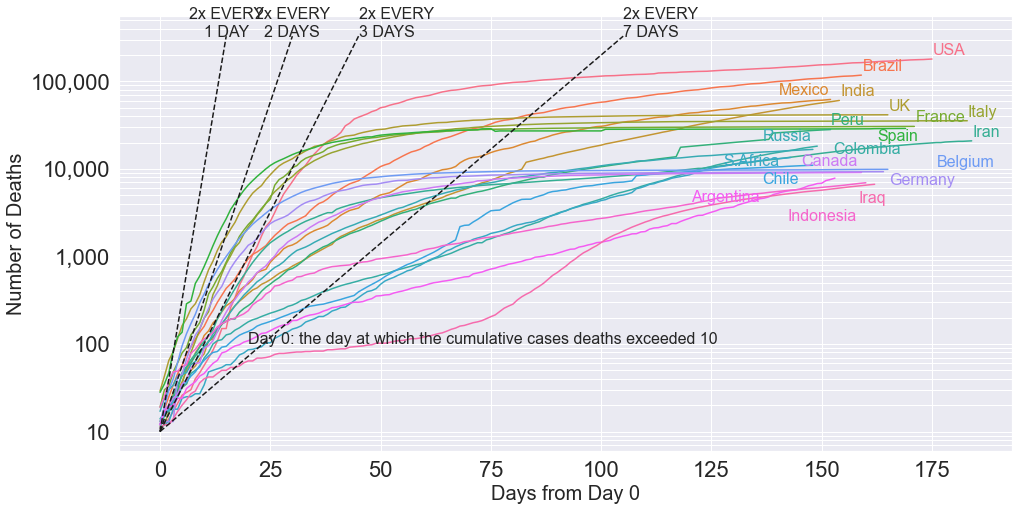

In [17]:
sns.set(rc={'figure.figsize':(16,8)}, font_scale = 2)
style = dict(size=10, color='gray')

ax = sns.lineplot(x="Days_from_0", y="Deaths", hue="Countries", data=covid_top_countries, markers=True, hue_order=top_countries, legend=False)

# Set the y-scale to logarithmic. The data is highly non-linear.
ax.set_yscale('log')
plt.grid(True, which='both')
ax.plot(x1, y_1, 'k--')
ax.plot(x2, y_2, 'k--')
ax.plot(x3, y_3, 'k--')
ax.plot(x7, y_7, 'k--')
ax.set_xlabel("Days from Day 0",fontsize=20)
ax.set_ylabel("Number of Deaths",fontsize=20)
ax.xaxis.set_major_formatter(ScalarFormatter())

# Label every line and add text to define Day 0.
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.xlim([0, 150])

# Format the y-axis tickers to have the number format: ,.0f. That is: comma to separate thousands and zero 
# decimal places.

# Label every line and add text to define Day 0.
plt.text(20, 100, 'Day 0: the day at which the cumulative cases deaths exceeded {:.0f}'.format(K), fontsize=16)
plt.text(x1.max(), y_1.max(), '2x EVERY\n1 DAY', ha = 'center', fontsize=16)
plt.text(x2.max(), y_2.max(), '2x EVERY\n2 DAYS', ha = 'center', fontsize=16)
plt.text(x3.max(), y_3.max(), '2x EVERY\n3 DAYS', ha = 'left', fontsize=16)
plt.text(x7.max(), y_7.max(), '2x EVERY\n7 DAYS', ha = 'left', fontsize=16)

# Use the package adjust text to optimize the position of the labels. 
# This package tries to minimize the overlap of the text labels whenever possible (results may vary).
texts = [plt.text(max_deaths.loc[str(country)]['Days_from_0'], max_deaths.loc[str(country)]['Deaths'], str(country), fontsize=16, color=ax.get_lines()[top_countries.index(country)].get_c(), ha = 'center', va = 'center') for country in top_countries]
adjust_text(texts)

plt.savefig('Fig_1_1_Song_Ziruo')

### Part 2. Plot the daily cases moving averages. (A.10 - A.13)
#### A.10 Use a for loop to iterate through every country in the ’top_countries’ and calculate the moving slope of the previous 7 days.

In [18]:
# back_calc IS THE BACK WINDOW THAT IS USED TO CALCULATE THE SLOPE
back_calc = 7
slope_df = pd.DataFrame(columns=['Countries', 'Days_from_0', 'Slope', 'R2', 'P_value'])

for country in top_countries:
    one_country_data = covid_top_countries[covid_top_countries['Countries'] == str(country)].reset_index(drop=True)
    for i in np.arange(back_calc, len(one_country_data)+1):
        x = one_country_data.loc[i-back_calc: i, 'Days_from_0'] # That is the 'Days_from_0'
        y = one_country_data.loc[i-back_calc: i, 'Deaths'] # 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_country_data.loc[i-1, 'Slope'] = slope
        one_country_data.loc[i-1, 'R2'] = r_value * r_value
        one_country_data.loc[i-1, 'P_value'] = p_value
        one_country = one_country_data[['Countries', 'Days_from_0', 'Slope', 'R2', 'P_value']]
    
    #slope_df = slope_df.append(one_country, ignore_index=False)
    slope_df = pd.concat([slope_df, one_country])
slope_df.head(15)

,Countries,Days_from_0,Slope,R2,P_value
0,USA,0,NaN,NaN,NaN
1,USA,1,NaN,NaN,NaN
2,USA,2,NaN,NaN,NaN
3,USA,3,NaN,NaN,NaN
4,USA,4,NaN,NaN,NaN
5,USA,5,NaN,NaN,NaN
6,USA,6,3.011905,0.974751,0.000005
7,USA,7,3.738095,0.958956,0.000022
8,USA,8,4.464286,0.952415,0.000034
9,USA,9,5.404762,0.941221,0.000065


#### A.11 Set ’Countries’ as the index and save the file: covid_b_slope_daily.xlsx

In [19]:
slope_df.set_index('Countries', drop=False, inplace=True)
slope_df.to_excel('covid_b_slope_daily.xlsx')

#### A.12 Create the df "max_slope" with the maximum slope value per country and sort them in descending order.
*  Filter appropriately to create the 4 dataframes data 1 5, data 6 10, data 11 15 and data 16 20 to plot them in the 4 subplots below.

In [20]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Countries']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Countries'] = max_slope.index

data_1_5 = slope_df[slope_df.Countries.isin(max_slope[:5]['Countries'].tolist())]
countries_1_5 = max_slope[:5]['Countries'].tolist()
data_6_10 = slope_df[slope_df.Countries.isin(max_slope[5:10]['Countries'].tolist())]
countries_6_10 = max_slope[5:10]['Countries'].tolist()
data_11_15 = slope_df[slope_df.Countries.isin(max_slope[10:15]['Countries'].tolist())]
countries_11_15 = max_slope[10:15]['Countries'].tolist()
data_16_20 = slope_df[slope_df.Countries.isin(max_slope[15:20]['Countries'].tolist())]
countries_16_20 = max_slope[15:20]['Countries'].tolist()

#### A.13 Use Seaborn’s lineplot and plot the 4 dataframes with the top 20 countries in a 2×2 subplots image. Use the package adjust texts to annotate the lines and linear scale in y-axis.

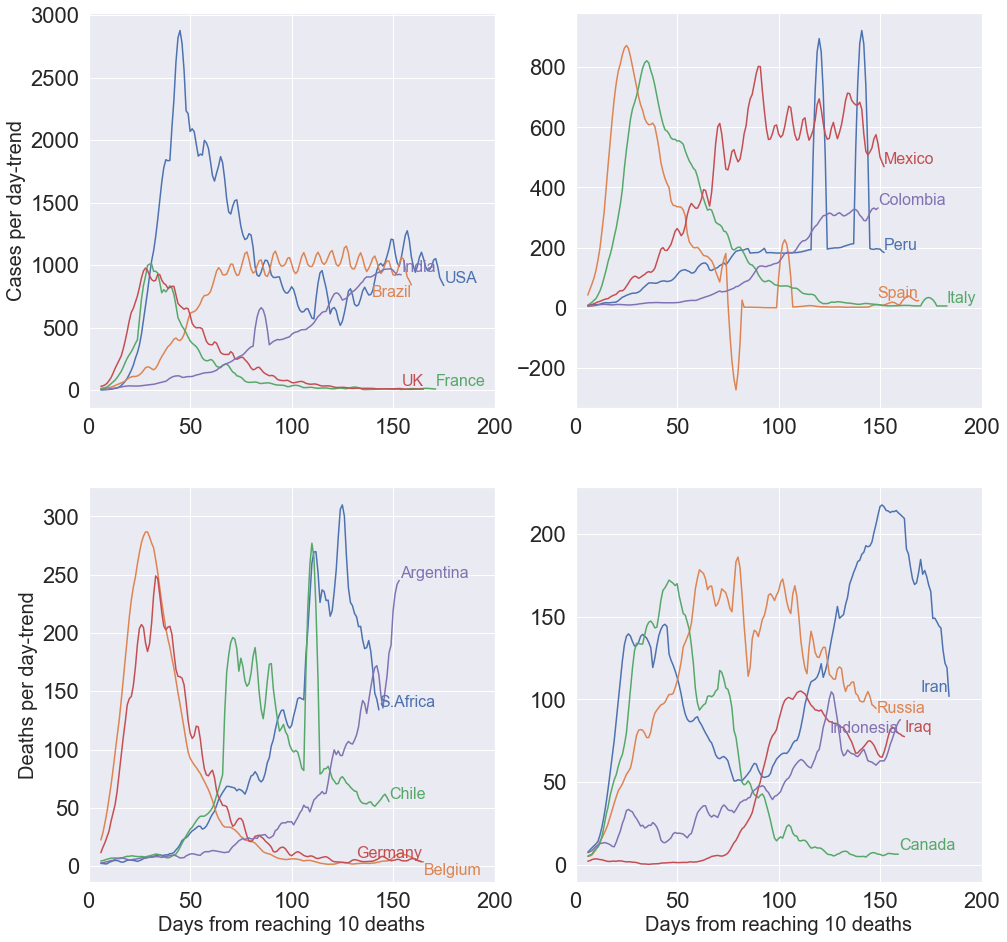

In [21]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_1_5.reset_index(), markers=True, hue_order=countries_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 0].get_lines()[countries_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Cases per day-trend",fontsize=20)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_6_10.reset_index(), markers=True, hue_order=countries_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 1].get_lines()[countries_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in countries_6_10]
adjust_text(texts)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_11_15.reset_index(), markers=True, hue_order=countries_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 0].get_lines()[countries_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Deaths per day-trend",fontsize=20)
axes[1, 0].set_xlabel("Days from reaching 10 deaths",fontsize=20)

sns.lineplot(x="Days_from_0", y="Slope", hue="Countries", data=data_16_20.reset_index(), markers=True, hue_order=countries_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_deaths.loc[str(country)]['Days_from_0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 1].get_lines()[countries_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching 10 deaths",fontsize=20)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])

plt.savefig('Fig_1_2_Song_Ziruo')

## B) Calculate the typical cumulative deaths and the excess deaths rate as the ratio of the cumulative deaths over the typical cumulative deaths expressed as %

#### Estimate of the typical death rate per country

In [22]:
death_rate = pd.read_excel('Death_rate_crude_per_1000_people.xls',sheet_name='Data', header=3, 
                           index_col=0).drop(columns=['Country Code','Indicator Name','Indicator Code'])
death_rate = death_rate.ffill(axis=1).iloc[:,-1]
death_rate = death_rate.to_frame(name='Death rate per 1000')
death_rate['Countries']=death_rate.index
death_rate.replace('United States','USA', inplace=True)
death_rate.replace('United Kindom','UK', inplace=True)
death_rate.replace('Korea, Rep','S.Korea', inplace=True)
death_rate.replace('Iran, Islamic Rep.','Iran', inplace=True)
death_rate.replace('Saudi Arabia','S.Arabia', inplace=True)
death_rate.replace('South Aferica','S.Aferica', inplace=True)
death_rate

,Death rate per 1000,Countries
Country Name,,
Aruba,8.907,Aruba
Afghanistan,6.575,Afghanistan
Angola,8.432,Angola
Albania,7.714,Albania
Andorra,4.300,Andorra
...,...,...
Kosovo,7.000,Kosovo
"Yemen, Rep.",5.978,"Yemen, Rep."
South Africa,9.498,South Africa


#### Left join the dataframe ’death rate’ with the dataframe ’covid top countries’ on ’Countries’.
* The crude death rate reported in the World Bank Data is an annual average per 1000 people. Therefore,convert it to daily typical deaths
* Calculate the typical cumulative deaths and the excess deaths rate as the ratio of the cumulative deaths over the typical cumulative deaths expressed as %

In [23]:
df = covid_top_countries.merge(death_rate, how='left', on ='Countries')
df['Typical_deaths_per_day'] = df['Death rate per 1000']* df['Population']/1000/365
df['Typical_cumulative_deaths'] = (df['Days_from_0'] + 1)* df['Typical_deaths_per_day']
df['Excess_death_rate'] = df['Deaths'] / df['Typical_cumulative_deaths'] * 100
df

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Death rate per 1000,Typical_deaths_per_day,Typical_cumulative_deaths,Excess_death_rate
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0,4.835,1098.325131,1098.325131,1.092573
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1,4.835,1098.325131,2196.650261,0.682858
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2,4.835,1098.325131,3294.975392,0.576636
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3,4.835,1098.325131,4393.300522,0.591810
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4,4.835,1098.325131,5491.625653,0.619125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,38027,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139,NaN,NaN,NaN,NaN
3231,38236,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140,NaN,NaN,NaN,NaN
3232,38445,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141,NaN,NaN,NaN,NaN
3233,38654,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142,NaN,NaN,NaN,NaN


In [24]:
max_rate = df.groupby(by=['Countries']).max()
max_rate = max_rate.sort_values('Excess_death_rate',ascending = False)
max_rate['Countries'] = max_rate.index
countries_temp = max_rate[:]['Countries'].tolist()

In [ ]:
sns.set(rc={'figure.figsize':(16,10)}, font_scale = 2)
df.index = df.Countries
ax=sns.lineplot(x="Days_from_0", y="Excess_death_rate", hue="Countries", data=df, markers=True, hue_order=countries_temp, legend=False)

plt.grid(True, which='both')
ax.set_ylabel("COVID-19 mortalities as % of typical death rate",fontsize=20)
plt.xlim([0, 175])
plt.ylim([0, 100])
plt.text(10, 90, 'Day 0: the day at which the cumulative \n deaths count exceeded {:.0f}'.format(K), fontsize=12)
texts = [plt.text(max_rate.loc[str(country)]['Days_from_0'], df.loc[str(country)]['Excess_death_rate'].iloc[-1],
                  str(country), fontsize=16, color=ax.get_lines()[countries_temp.index(country)].get_c(), ha = 'center', va = 'center') for country in countries_temp]
adjust_text(texts)

In [ ]:
plt.savefig('Fig_1_3_Song_Ziruo.png')